In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("supermarket_product.csv")
print("Dataset Info:\n")
print(df.info())

numeric_cols = df.select_dtypes(include=["number"]).columns
object_cols = df.select_dtypes(include=["object"]).columns

print("\nHandling Missing Values...")
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df[object_cols] = df[object_cols].fillna(df[object_cols].mode().iloc[0])
print("Missing values after handling:\n", df.isnull().sum())

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

original_shape = df.shape
for col in numeric_cols:
    df = remove_outliers(df, col)
print(f"\nOutliers removed. Rows reduced from {original_shape[0]} to {df.shape[0]}.")

quantity_col = None
price_col = None

for col in df.columns:
    if "quantity" in col.lower():
        quantity_col = col
    if "price" in col.lower() or "mrp" in col.lower():
        price_col = col

if quantity_col and price_col:
    df["Total_Price"] = df[quantity_col] * df[price_col]
    print(f"\nNew Variable 'Total_Price' created using '{quantity_col}' and '{price_col}'.")
else:
    print("\nCould not create 'Total_Price': Required columns not found.")

df.to_csv("supermarket_product_cleaned.csv", index=False)
print("\nData Cleaning Completed! Cleaned dataset saved as 'supermarket_product_cleaned.csv'.")
print("\nSample data:\n", df.head())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8193 entries, 0 to 8192
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8193 non-null   object 
 1   Item_Weight                8193 non-null   float64
 2   Item_Fat_Content           8193 non-null   object 
 3   Item_Visibility            8193 non-null   float64
 4   Item_Type                  8193 non-null   object 
 5   Item_MRP                   8193 non-null   float64
 6   Outlet_Identifier          8193 non-null   object 
 7   Outlet_Establishment_Year  8193 non-null   int64  
 8   Outlet_Size                8193 non-null   object 
 9   Outlet_Location_Type       8193 non-null   object 
 10  Outlet_Type                8193 non-null   object 
 11  Item_Outlet_Sales          8193 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 768.2+ KB
None

Handling Missing Values.


📊 Basic Descriptive Statistics:
 count    8144.000000
mean     2070.459287
std      1474.202631
min        33.290000
25%       856.884600
50%      1773.691200
75%      3003.590250
max      6261.849000
Name: Item_Outlet_Sales, dtype: float64

🧮 Additional Stats:
Mean: 2070.46
Median: 1773.69
Standard Deviation: 1474.20
Variance: 2173273.40
Range: 6228.56
IQR (Interquartile Range): 2146.71
Skewness: 0.74
Kurtosis: -0.21

📈 Z-Scores calculated and added to dataset.

👥 Customer Type Distribution:
 Customer_Type
Mid-Value     4069
Low-Value     2039
High-Value    2036
Name: count, dtype: int64

🔍 Avg Sales by Customer Type:
 Customer_Type
High-Value    4166.570187
Low-Value      449.636063
Mid-Value     1833.835242
Name: Item_Outlet_Sales, dtype: float64


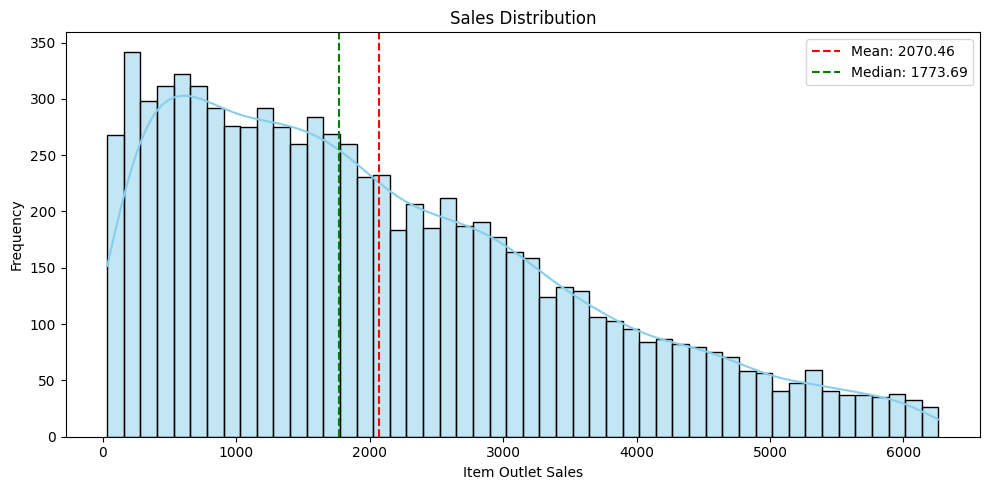

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, skew, kurtosis

df = pd.read_csv("supermarket_product_cleaned.csv")

print("\n📊 Basic Descriptive Statistics:\n", df["Item_Outlet_Sales"].describe())

mean_val = df["Item_Outlet_Sales"].mean()
median_val = df["Item_Outlet_Sales"].median()
std_val = df["Item_Outlet_Sales"].std()
var_val = df["Item_Outlet_Sales"].var()
range_val = df["Item_Outlet_Sales"].max() - df["Item_Outlet_Sales"].min()
iqr_val = df["Item_Outlet_Sales"].quantile(0.75) - df["Item_Outlet_Sales"].quantile(0.25)
skew_val = skew(df["Item_Outlet_Sales"])
kurt_val = kurtosis(df["Item_Outlet_Sales"])

print("\n🧮 Additional Stats:")
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Standard Deviation: {std_val:.2f}")
print(f"Variance: {var_val:.2f}")
print(f"Range: {range_val:.2f}")
print(f"IQR (Interquartile Range): {iqr_val:.2f}")
print(f"Skewness: {skew_val:.2f}")
print(f"Kurtosis: {kurt_val:.2f}")

df["Sales_ZScore"] = zscore(df["Item_Outlet_Sales"])
print("\n📈 Z-Scores calculated and added to dataset.")

high_value_threshold = df["Item_Outlet_Sales"].quantile(0.75)
low_value_threshold = df["Item_Outlet_Sales"].quantile(0.25)

df["Customer_Type"] = np.where(
    df["Item_Outlet_Sales"] >= high_value_threshold, "High-Value",
    np.where(df["Item_Outlet_Sales"] <= low_value_threshold, "Low-Value", "Mid-Value"))

print("\n👥 Customer Type Distribution:\n", df["Customer_Type"].value_counts())
print("\n🔍 Avg Sales by Customer Type:\n", df.groupby("Customer_Type")["Item_Outlet_Sales"].mean())

plt.figure(figsize=(10, 5))
sns.histplot(df["Item_Outlet_Sales"], bins=50, kde=True, color="skyblue")
plt.axvline(mean_val, color='red', linestyle="--", label=f"Mean: {mean_val:.2f}")
plt.axvline(median_val, color='green', linestyle="--", label=f"Median: {median_val:.2f}")
plt.title("Sales Distribution")
plt.xlabel("Item Outlet Sales")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

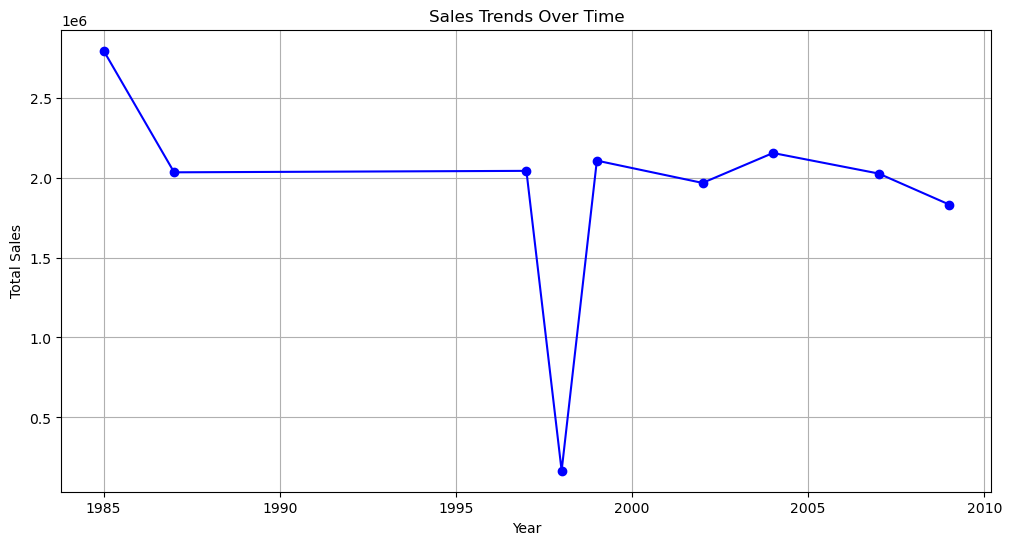

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("supermarket_product.csv")
df["Item_Outlet_Sales"] = pd.to_numeric(df["Item_Outlet_Sales"], errors="coerce")
plt.figure(figsize=(12, 6))
df.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].sum().plot(marker="o", linestyle="-", color="b")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Sales Trends Over Time")
plt.grid()
plt.show()

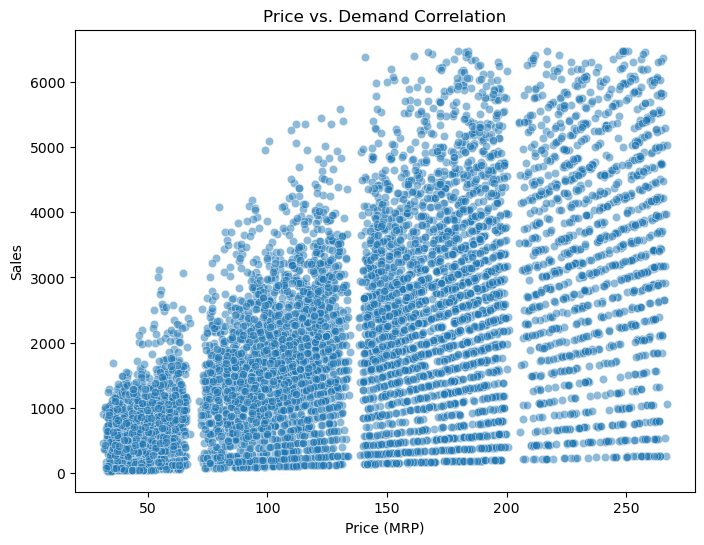

In [31]:
import seaborn as sns
df["Item_MRP"] = pd.to_numeric(df["Item_MRP"], errors="coerce")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Item_MRP"], y=df["Item_Outlet_Sales"], alpha=0.5)
plt.xlabel("Price (MRP)")
plt.ylabel("Sales")
plt.title("Price vs. Demand Correlation")
plt.show()

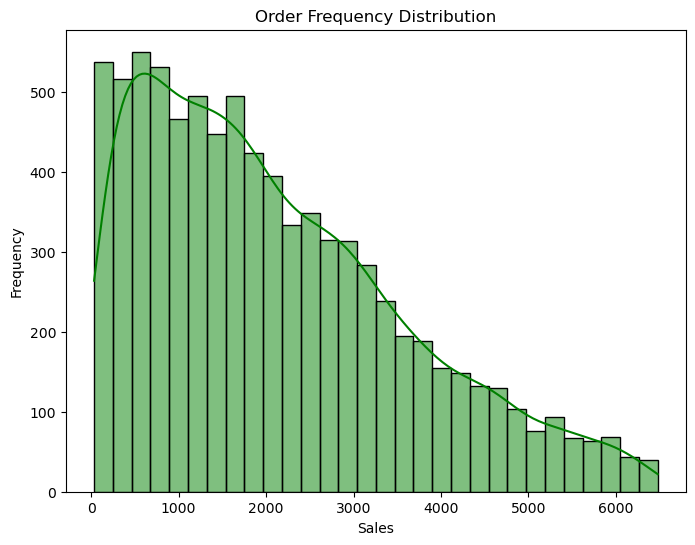

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Item_Outlet_Sales"], bins=30, kde=True, color="g")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Order Frequency Distribution")
plt.show()

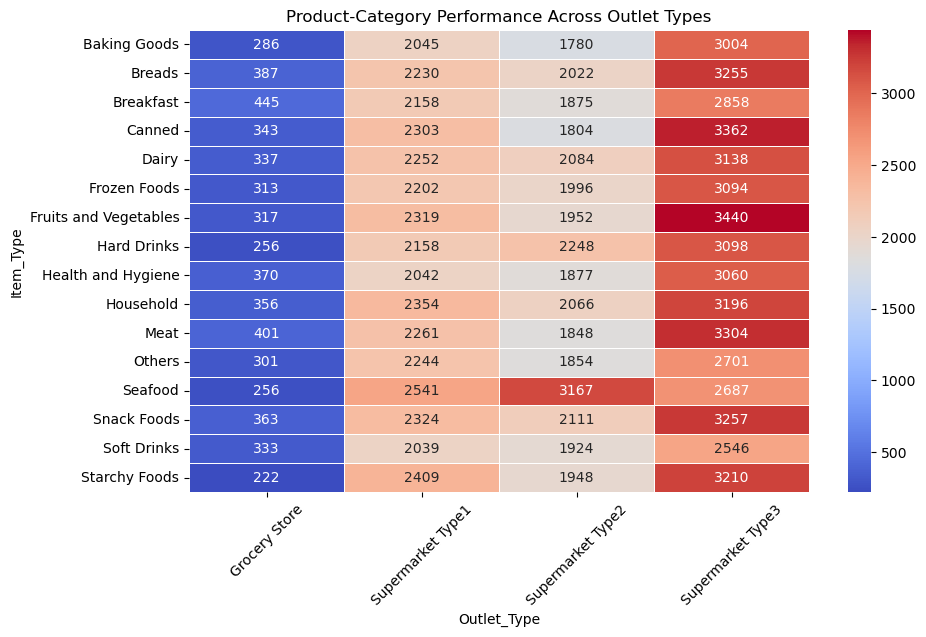

In [35]:
pivot_table = df.pivot_table(values="Item_Outlet_Sales", index="Item_Type", columns="Outlet_Type", aggfunc="mean")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Product-Category Performance Across Outlet Types")
plt.xticks(rotation=45)
plt.show()

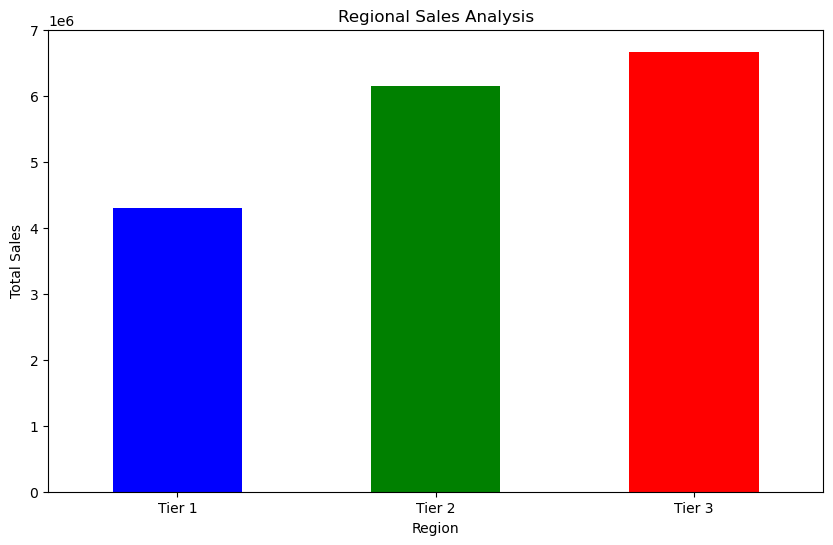

In [37]:
region_sales = df.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].sum().sort_values()
plt.figure(figsize=(10, 6))
region_sales.plot(kind="bar", color=["blue", "green", "red"])
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.title("Regional Sales Analysis")
plt.xticks(rotation=0)
plt.show()

In [39]:
import pandas as pd
df = pd.read_csv("supermarket_product.csv")
df["Discount"] = df["Item_MRP"] - (df["Item_Outlet_Sales"] / df["Item_Weight"])
correlation = df[["Discount", "Item_Outlet_Sales"]].corr()
print("Correlation between Discount and Sales Volume:\n", correlation)

Correlation between Discount and Sales Volume:
                    Discount  Item_Outlet_Sales
Discount           1.000000          -0.682806
Item_Outlet_Sales -0.682806           1.000000


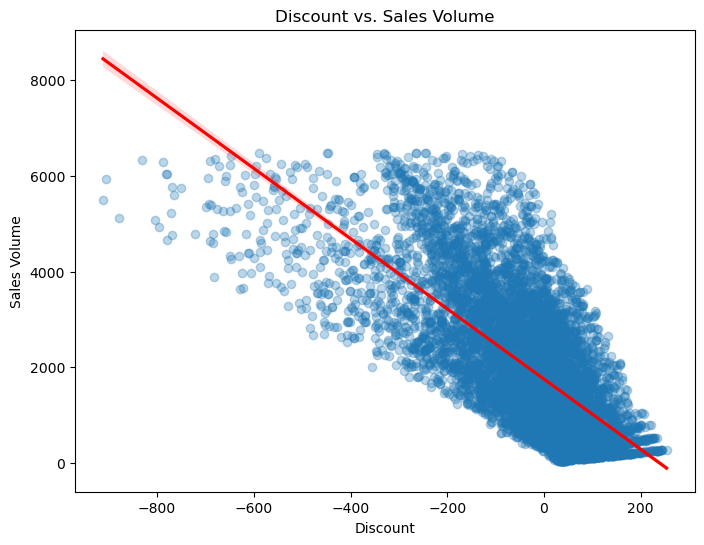

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.regplot(x=df["Discount"], y=df["Item_Outlet_Sales"], scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
plt.xlabel("Discount")
plt.ylabel("Sales Volume")
plt.title("Discount vs. Sales Volume")
plt.show()

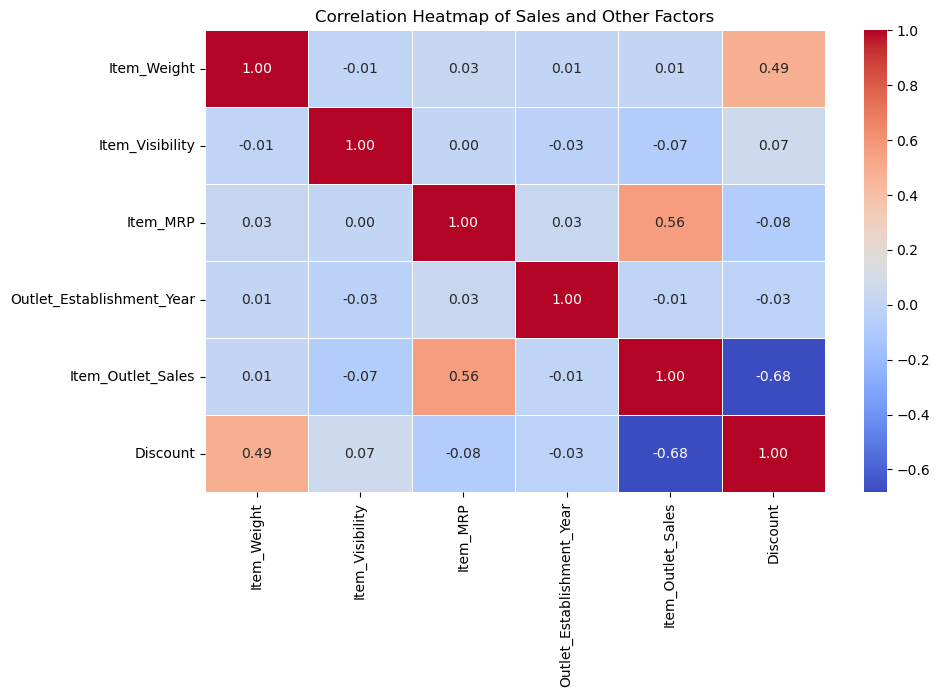

In [47]:
numeric_df = df.select_dtypes(include=["number"])
corr_matrix = numeric_df.corr()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Sales and Other Factors")
plt.show()

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

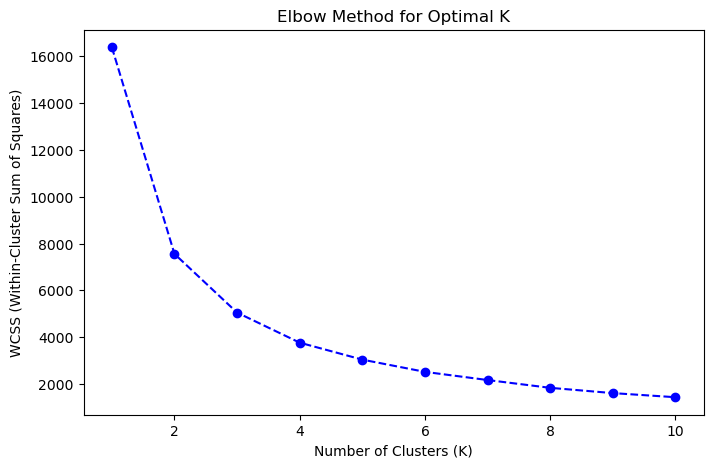

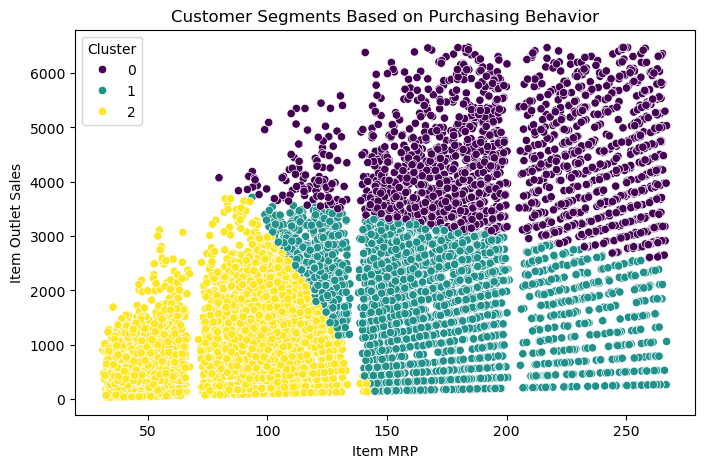

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("supermarket_product.csv")
features = ["Item_Outlet_Sales", "Item_MRP"]
df_cluster = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)
wcss = []  # Initialize WCSS list
for i in range(1, 11):  # Testing cluster values from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Item_MRP"], y=df["Item_Outlet_Sales"], hue=df["Cluster"], palette="viridis")
plt.xlabel("Item MRP")
plt.ylabel("Item Outlet Sales")
plt.title("Customer Segments Based on Purchasing Behavior")
plt.show()

Mean Squared Error: 1622286.822426081
R-squared Score: 0.3040135538004589


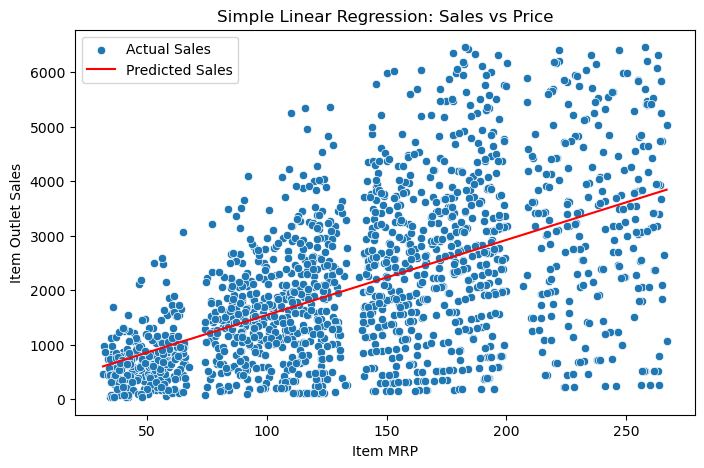

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("supermarket_product.csv") 
X = df[["Item_MRP"]] 
y = df["Item_Outlet_Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test["Item_MRP"], y=y_test, label="Actual Sales")
sns.lineplot(x=X_test["Item_MRP"], y=y_pred, color="red", label="Predicted Sales")
plt.xlabel("Item MRP")
plt.ylabel("Item Outlet Sales")
plt.title("Simple Linear Regression: Sales vs Price")
plt.legend()
plt.show()

Multiple Regression - Mean Squared Error: 1302413.2282339283
Multiple Regression - R-squared Score: 0.44124433381871575


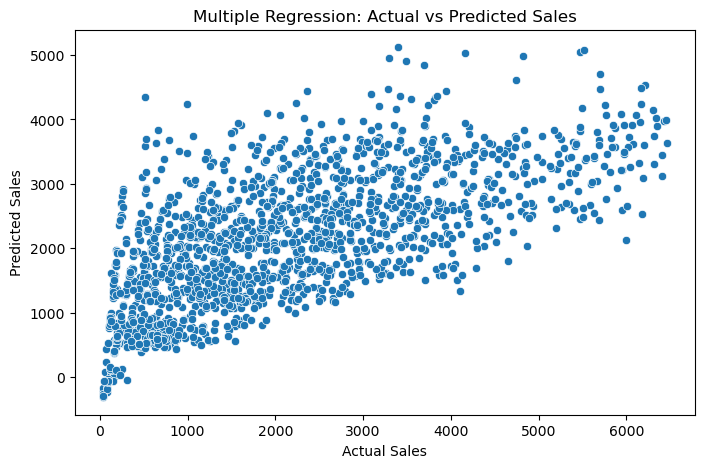

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("supermarket_product.csv")
df["Outlet_Age"] = 2025 - df["Outlet_Establishment_Year"]
le = LabelEncoder()
df["Item_Fat_Content"] = le.fit_transform(df["Item_Fat_Content"])  # Encode Low Fat, Regular, etc.
df["Outlet_Type"] = le.fit_transform(df["Outlet_Type"])  # Example encoding for categorical column
X_multi = df[["Item_MRP", "Outlet_Age", "Item_Fat_Content", "Outlet_Type"]]
y_multi = df["Item_Outlet_Sales"]
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)
y_pred_multi = multi_model.predict(X_test)
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)
print(f"Multiple Regression - Mean Squared Error: {mse_multi}")
print(f"Multiple Regression - R-squared Score: {r2_multi}")
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_multi)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Multiple Regression: Actual vs Predicted Sales")
plt.show()

R² Score: 0.4908
Mean Squared Error: 1137696.54
Standard Error of Estimate (SEE): 1066.63


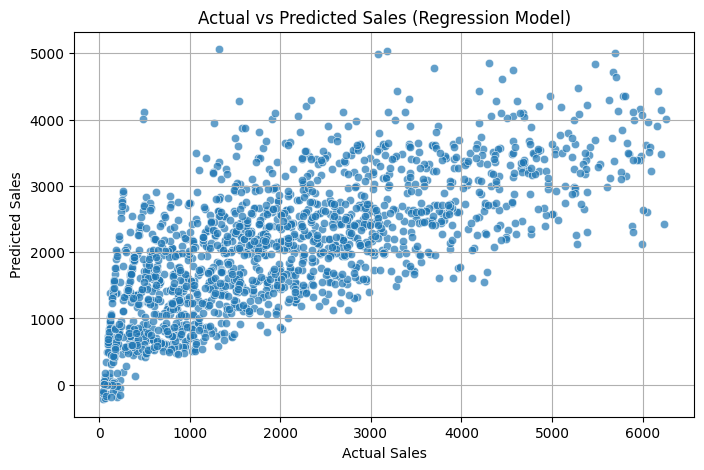

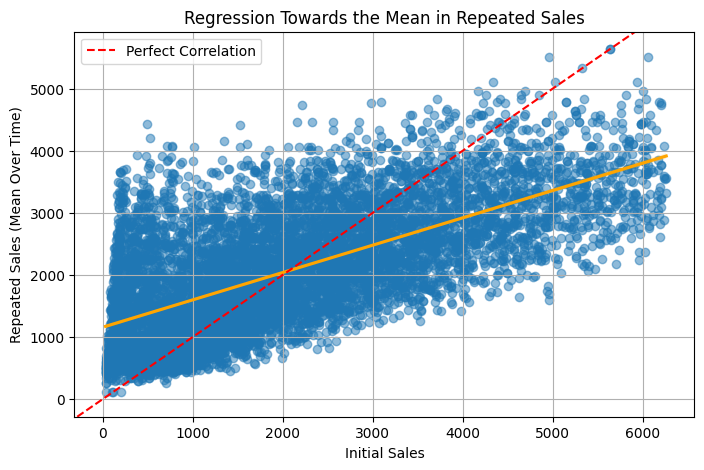


Sample of Sale Difference:
    Item_Outlet_Sales  Repeated_Sales    Sale_Diff
0          3735.1380     4432.363760  -697.225760
1           443.4228      862.211000  -418.788200
2          2097.2700     1478.076000   619.194000
3           732.3800     3021.067500 -2288.687500
4           994.7052      653.926567   340.778633

Correlation Between Initial and Repeated Sales: 0.6636


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("supermarket_product_cleaned.csv")  
df["Outlet_Age"] = 2025 - df["Outlet_Establishment_Year"]
le = LabelEncoder()
df["Item_Fat_Content"] = le.fit_transform(df["Item_Fat_Content"])  
df["Outlet_Type"] = le.fit_transform(df["Outlet_Type"])

X = df[["Item_MRP", "Outlet_Age", "Item_Fat_Content", "Outlet_Type"]]
y = df["Item_Outlet_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)
y_pred = multi_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
see = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Standard Error of Estimate (SEE): {see:.2f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Regression Model)")
plt.grid(True)
plt.show()

df["Repeated_Sales"] = df.groupby("Item_Identifier")["Item_Outlet_Sales"].transform("mean")

plt.figure(figsize=(8, 5))
sns.regplot(
    x=df["Item_Outlet_Sales"], 
    y=df["Repeated_Sales"], 
    scatter_kws={'alpha': 0.5}, 
    line_kws={'color': 'orange'}
)
plt.xlabel("Initial Sales")
plt.ylabel("Repeated Sales (Mean Over Time)")
plt.title("Regression Towards the Mean in Repeated Sales")
plt.axline((0, 0), slope=1, color="red", linestyle="--", label="Perfect Correlation")
plt.legend()
plt.grid(True)
plt.show()

df["Sale_Diff"] = df["Item_Outlet_Sales"] - df["Repeated_Sales"]
print("\nSample of Sale Difference:\n", df[["Item_Outlet_Sales", "Repeated_Sales", "Sale_Diff"]].head())

sales_corr = df[["Item_Outlet_Sales", "Repeated_Sales"]].corr().iloc[0, 1]
print(f"\nCorrelation Between Initial and Repeated Sales: {sales_corr:.4f}")
